In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

ratioKeys = ['psRatio', 'peRatio', 'priceToBook', 'evToEbitda', 'evToEbit', 'priceToFreeCashFlow', 'evToSales', 'evToGrossProfit', 'priceToGrossProfit']
yKeys = ['yAdjustedPriceSpinoffExcl1Year', 'yAdjustedPrice1Year', 'yPrice1Year']
y2Keys = ['yAdjustedPriceSpinoffExcl2Year', 'yAdjustedPrice2Year', 'yPrice2Year']
numericalKeys = ratioKeys + yKeys + y2Keys

In [21]:
df = pd.read_csv('../data/temp.csv', sep='\t')

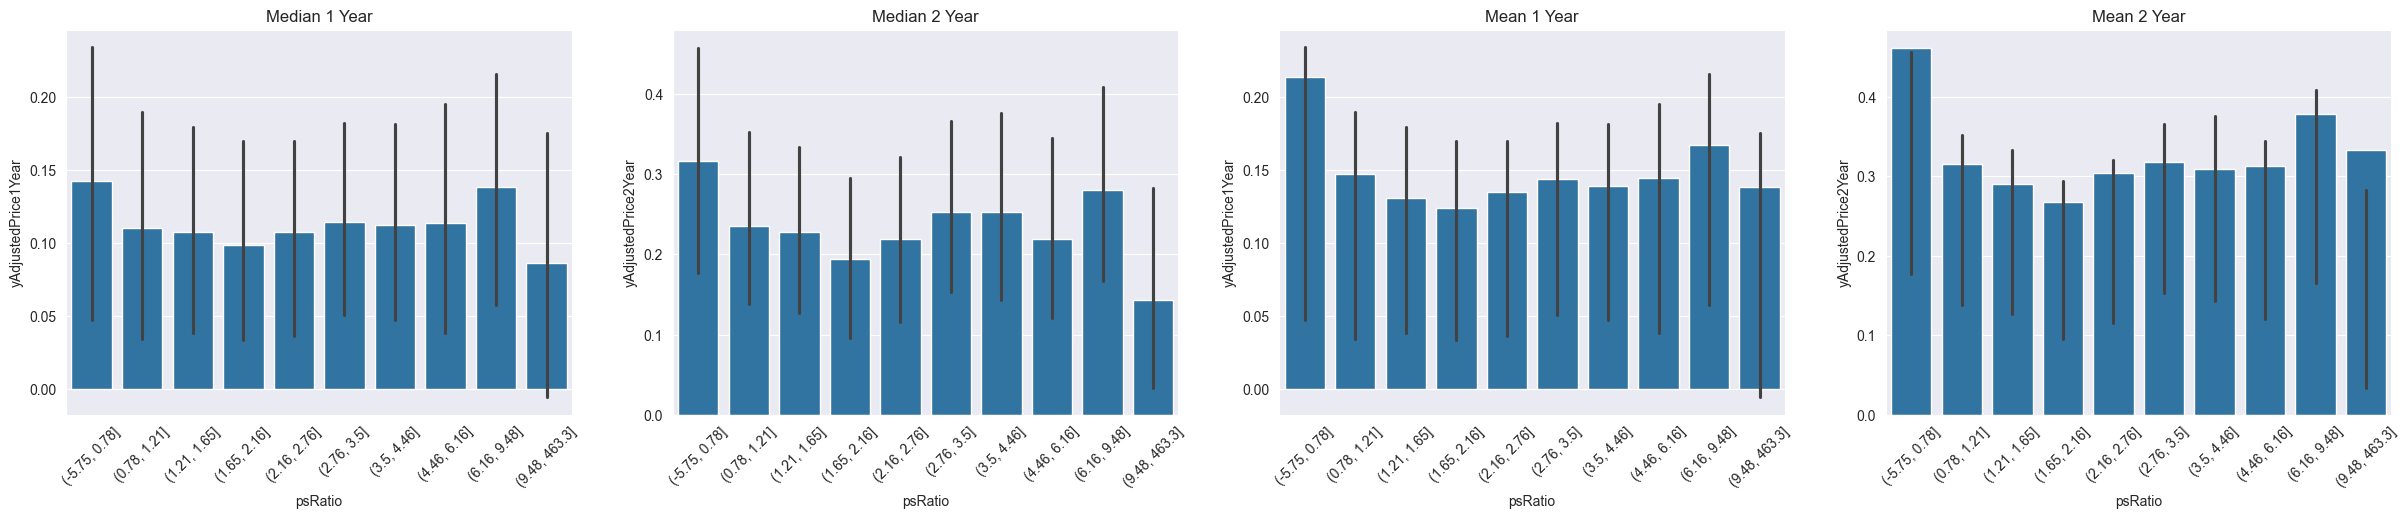

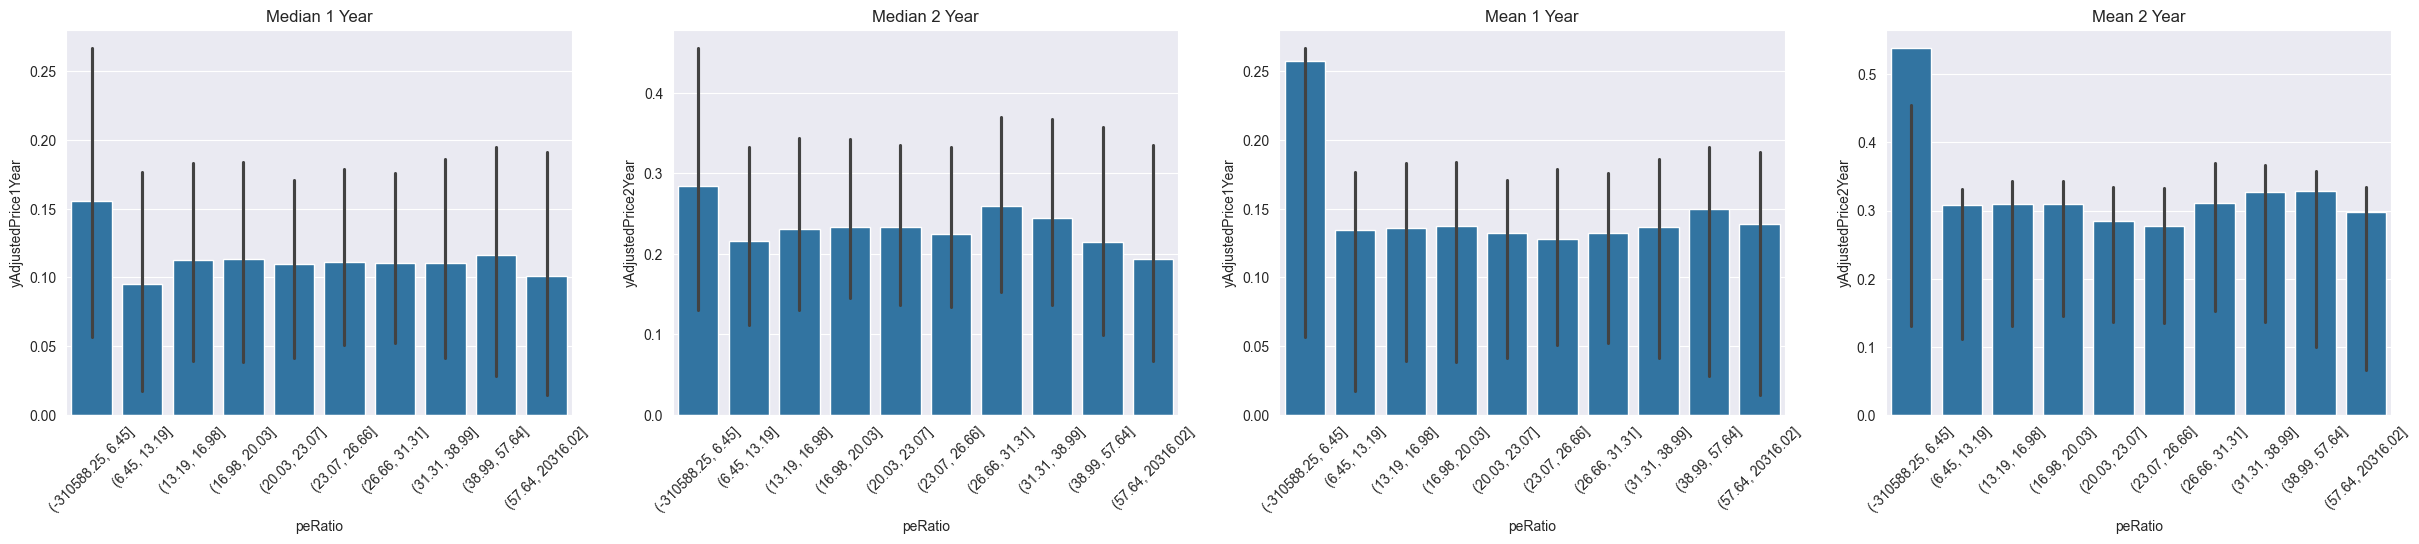

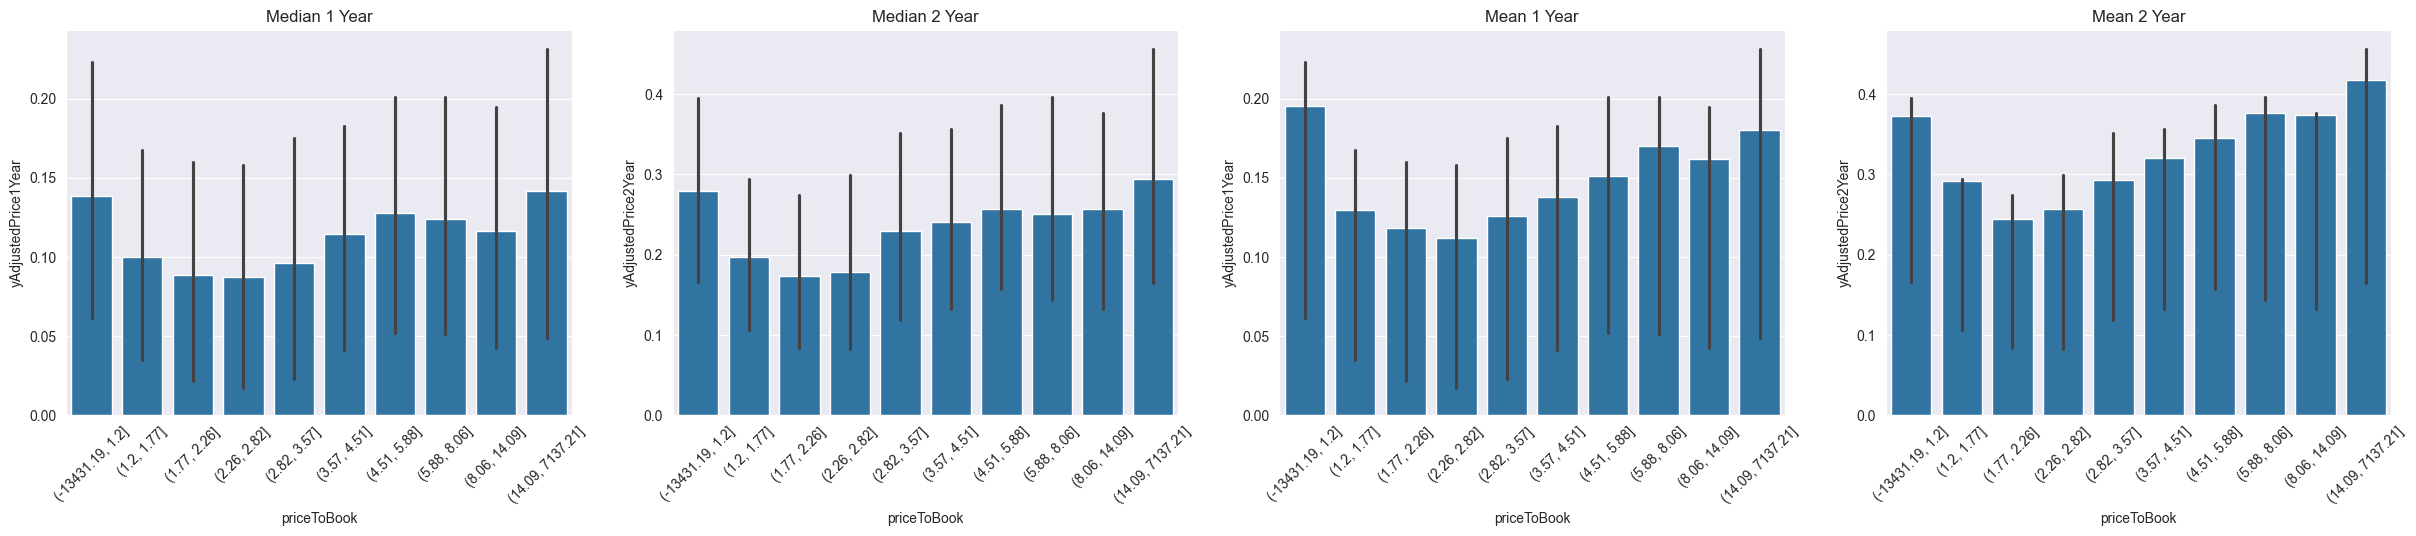

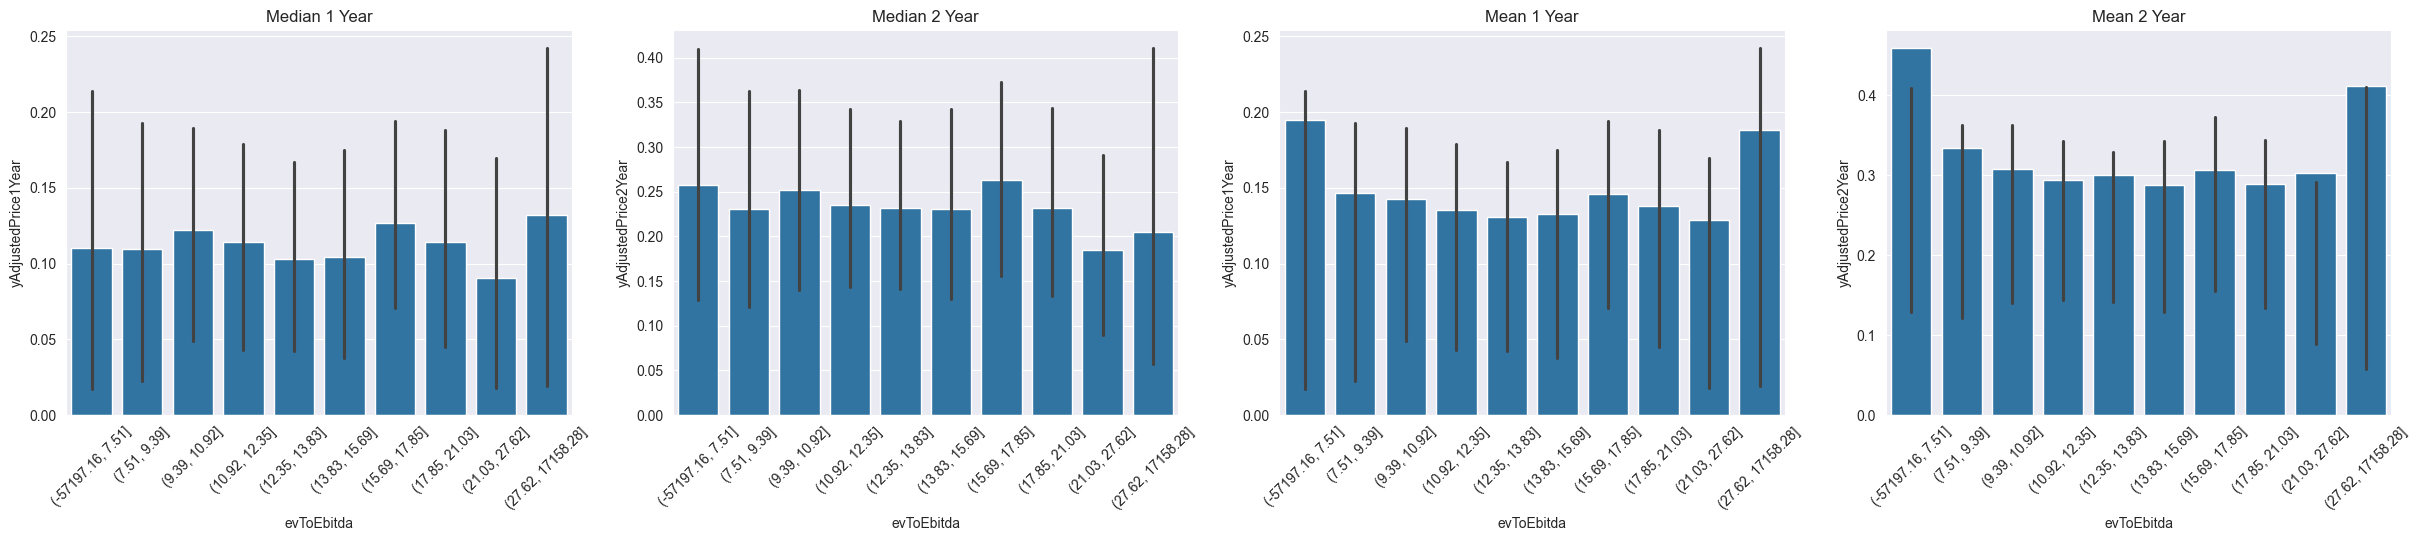

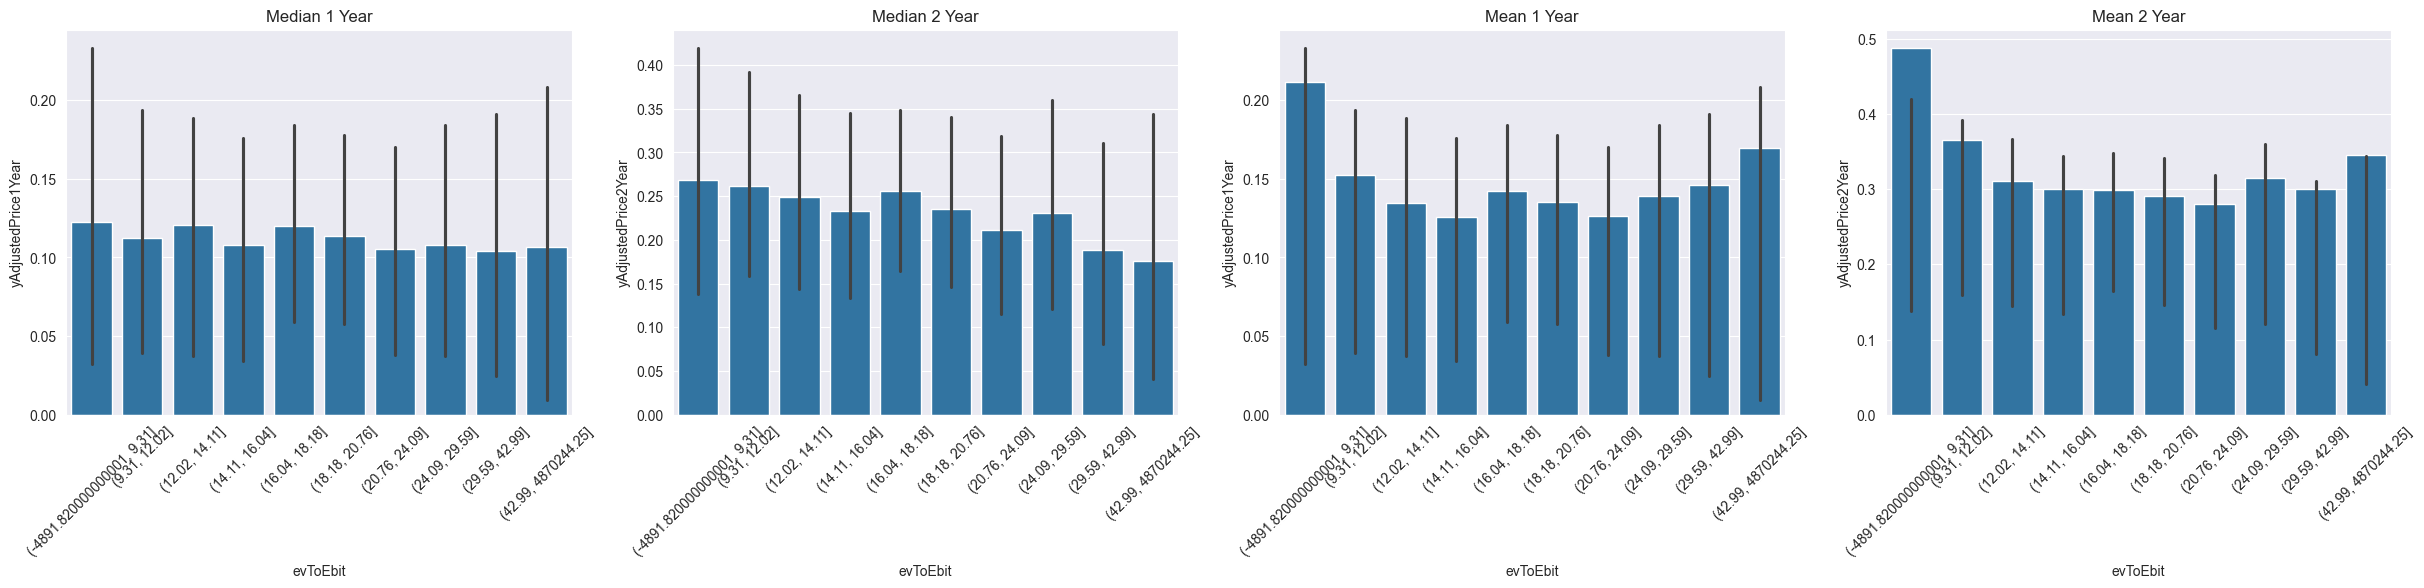

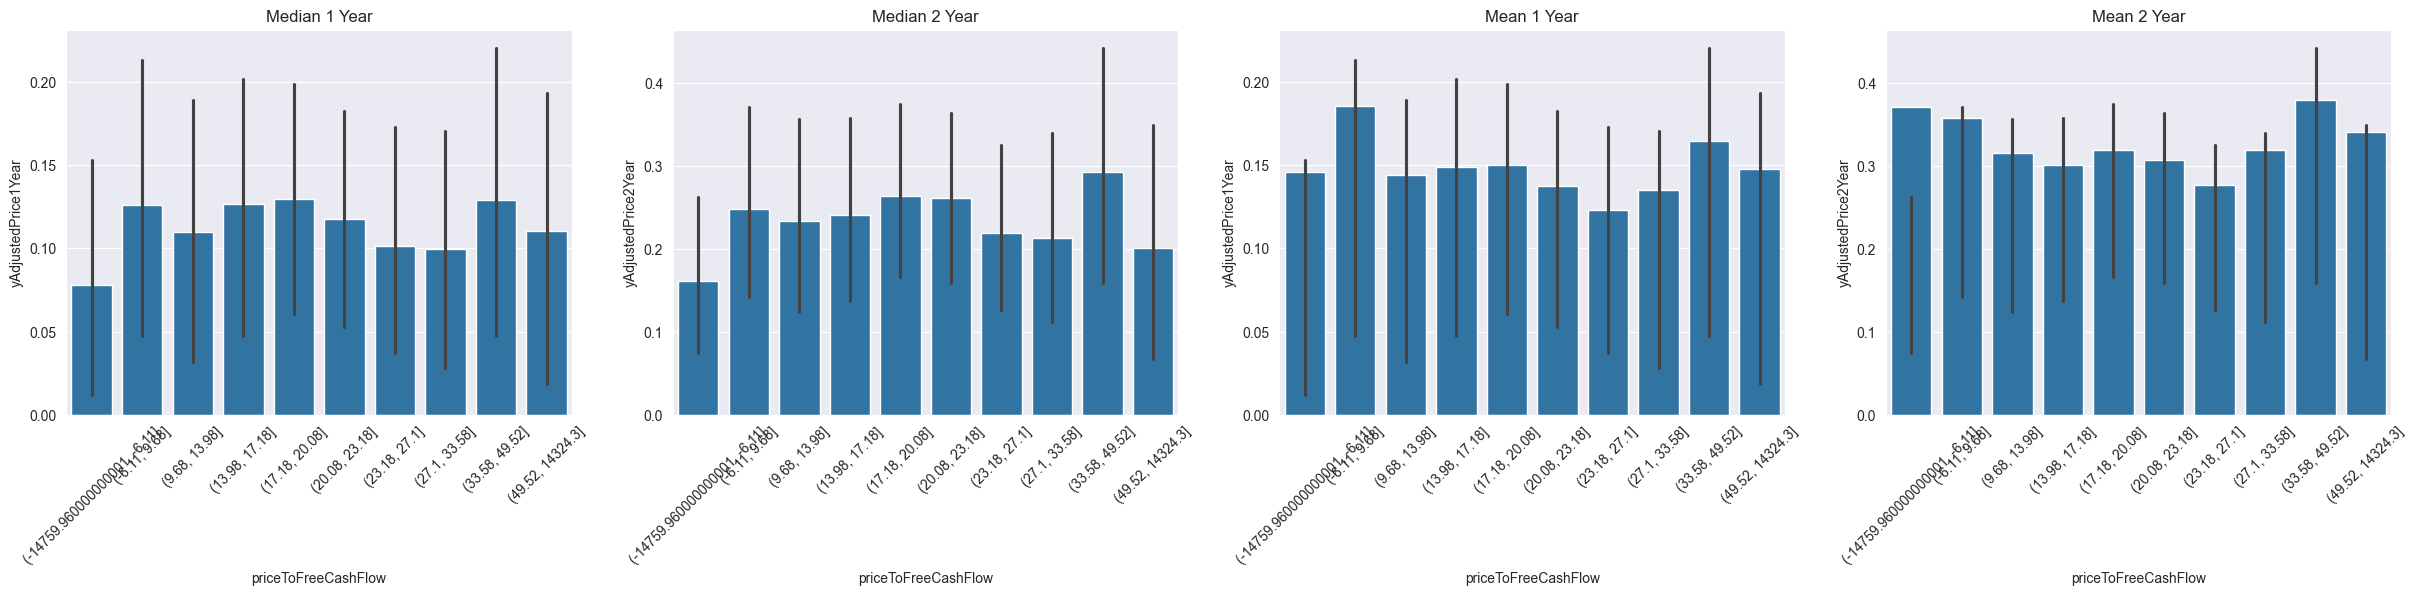

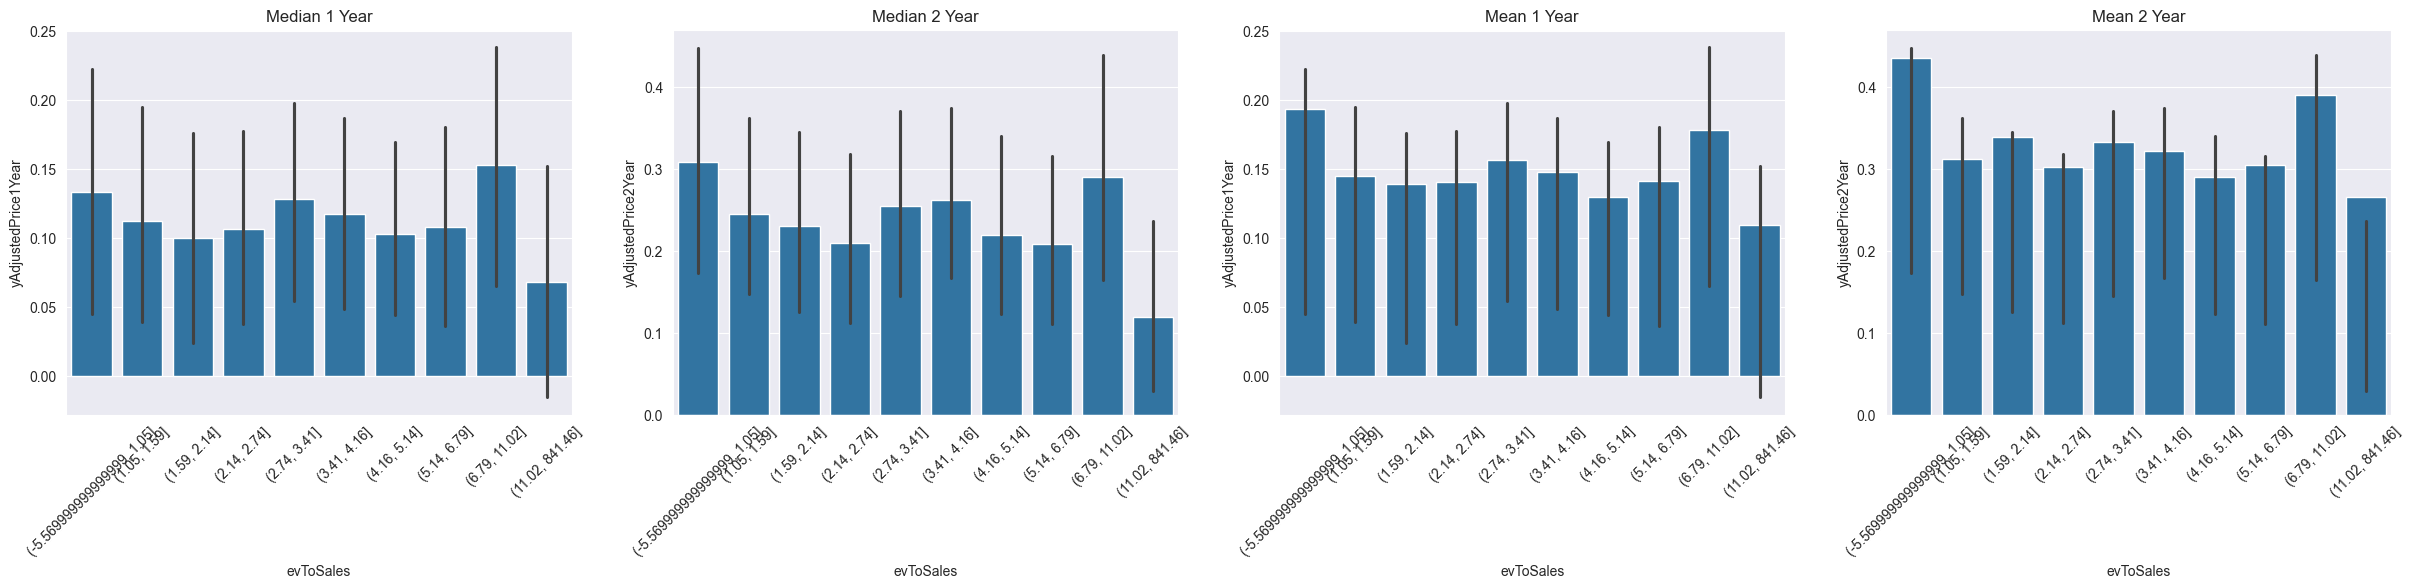

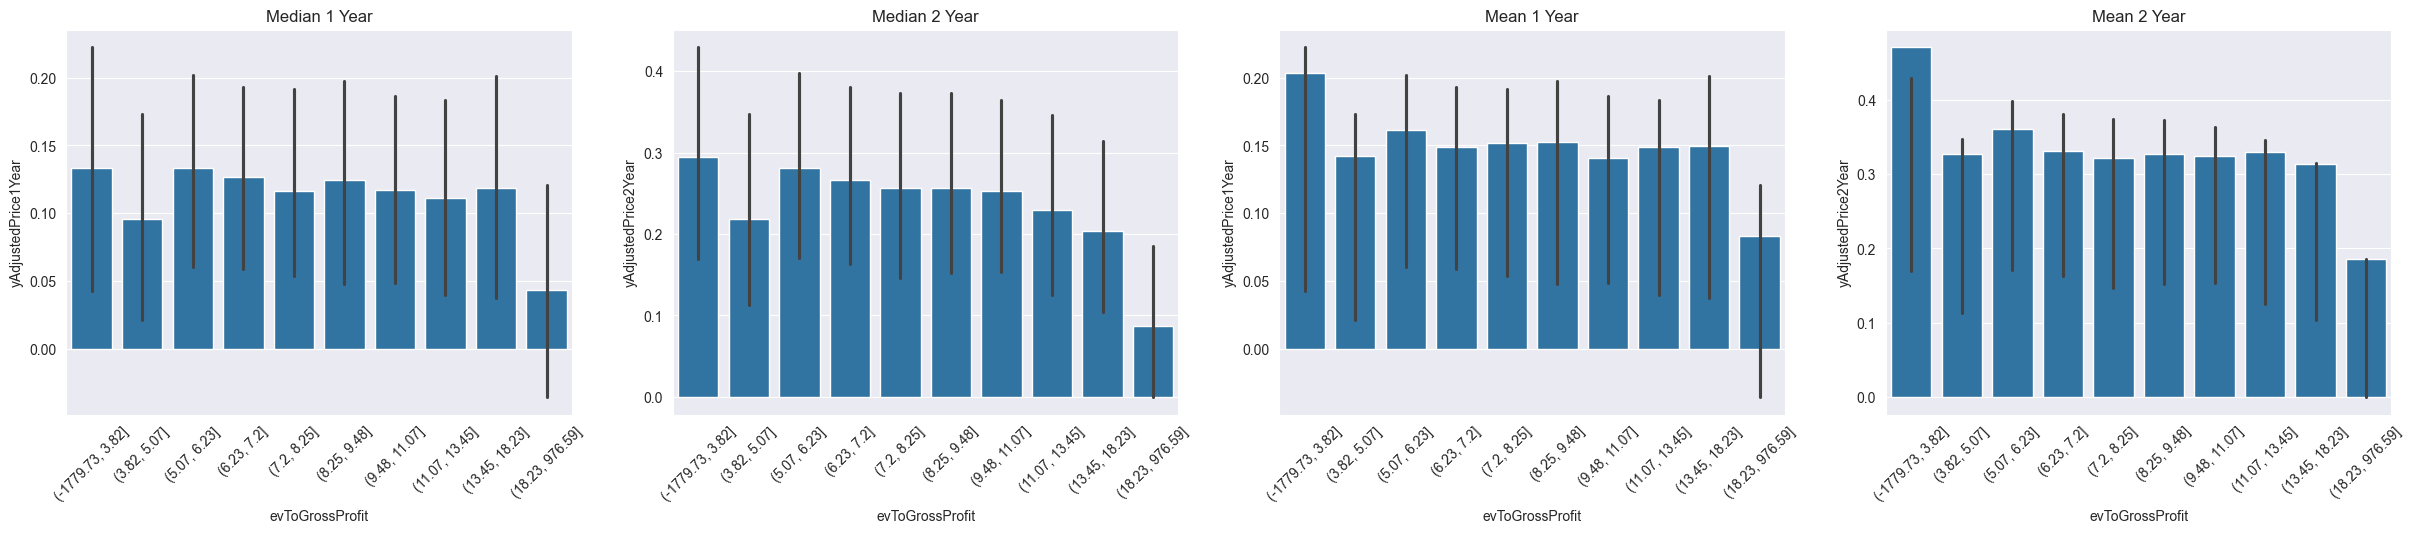

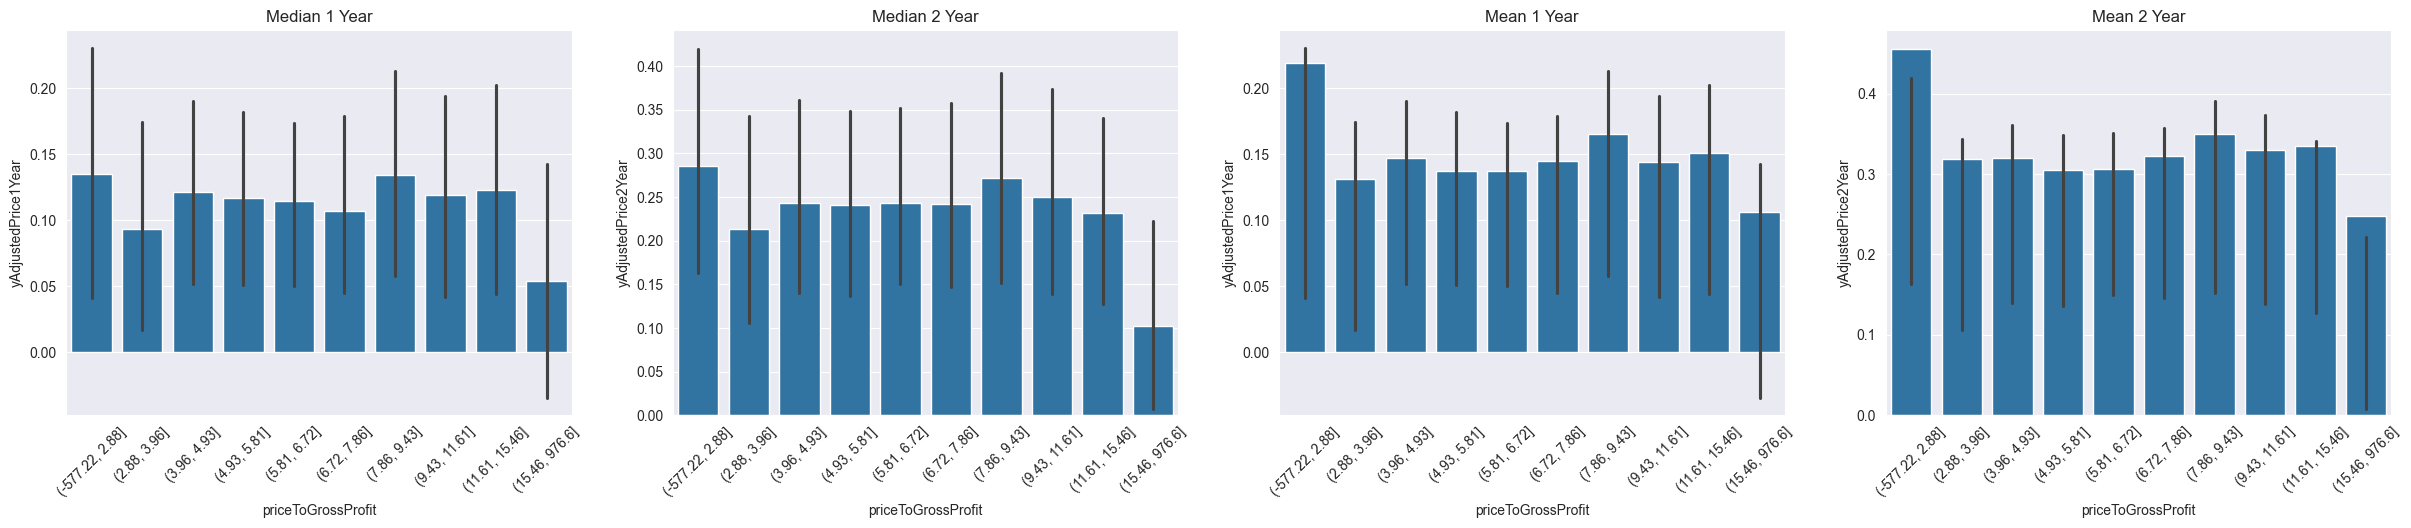

In [23]:
warnings.filterwarnings('ignore')

for key in ratioKeys:
    bin_key = key + '_bin'
    df[bin_key] = pd.qcut(df[key],10, precision=2)
    
    fig, axes = plt.subplots(1, 4, figsize=(30, 5))
    sns.barplot(df, x=bin_key, y='yAdjustedPrice1Year', estimator=np.median, errorbar=('pi', 25), ax=axes[0])
    axes[0].set(title = 'Median 1 Year', xlabel=key)
    axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
    
    sns.barplot(df, x=bin_key, y='yAdjustedPrice2Year', estimator=np.median, errorbar=('pi', 25), ax=axes[1])
    axes[1].set(title = 'Median 2 Year', xlabel=key)
    axes[1].set_xticklabels(axes[0].get_xticklabels(), rotation=45)

    sns.barplot(df, x=bin_key, y='yAdjustedPrice1Year',  errorbar=('pi', 25), ax=axes[2])
    axes[2].set(title = 'Mean 1 Year', xlabel=key)
    axes[2].set_xticklabels(axes[0].get_xticklabels(), rotation=45)

    sns.barplot(df, x=bin_key, y='yAdjustedPrice2Year',  errorbar=('pi', 25), ax=axes[3])
    axes[3].set(title = 'Mean 2 Year', xlabel=key)
    axes[3].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
    

    plt.show()
